# Logistic Regression



$p(x) = \frac{e^{\beta_0 + \beta_1 x_1 + ... + \beta_p x_p}}{1 + e^{\beta_0 + \beta_1 x_1 + ... + \beta_p x_p}}$, for any given values of $\beta_0, \beta_1$ and $x$, the value of $P(x)$ will always sit between [0,1]

Takes the log transformation of both sides and do some rearrangements (This is called **log odds** or **logit** transformation of $p(x)$), gives us

<br />

**Formula**:

$ y = log(\frac{p(x)}{1-p(x)}) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p$, where $x$ can take either continuous or categorical values

<br />

**Note**:

The coefficients of logistic regression model are calculated using **MLE (Maximum likelihood estimation)**

Log-likelihood for $N$ observations:
- $L(\beta) = \sum_{i=1}^N \{y_i \cdot log(p(x_i;\beta)) + (1-y_i) \cdot log(1-p(x_i;\beta))\} = \sum_{i=1}^N \{y_i \beta^T x_i - log(1+e^{\beta^T x_i}) \}$

<br />

The intuition behind the MLE is to find $\beta_0, \beta_1, ..., \beta_i$ such that $\hat{p}(x_i)$ has value close to one for $y_i = 1$ and has value close to zero for $y_i = 0$

## Assumptions

1. The model should not have multicollinearity (Should do some data exploration before fitting the model)

## Interpretation

1. The **sign of coefficients** represents positive/negative influence on dependent variable
2. One unit increase in $X_i$ changes the **log odds** $log(\frac{p(x)}{1-p(x)})$ by $\beta_i$
3. One unit increase in $X_i$ multiplies the **odds** $\frac{p(x)}{1-p(x)}$ by $e^{\beta_i}$
4. The amount of $p(x)$ changes depend on **the current value of $x$ and the value of $\beta$**.

### [Intuitive interpretation of **Odds** and **Log Odds**](https://www.youtube.com/watch?v=8nm0G-1uJzA&t=459s) 
1. **Odds**: The ratio of something happpening to something not happening. Example: $\frac{P\ (my\ team\ winning)}{P\ (my\ team\ not\ winning)}$
2. **Log Odds**: Taking the log of odds ratio to normalize the value between 0 and 1. Odds ratio and log odds indicate the relationship between two variables. Larger values indicate one variable is a good predictor of the other.

P.S. To assess whether the value of odds raio or log odds is statistically significant or not, one can use any of the following tests to examine: (1) Fisher's Exact Test (2) Chi-Square Test (3) The Wald Test
    

## Practice Suggestions

(1) Since the influence of some independent variable ($x$) on dependent variable ($y$) can changes when we adding and removing other variables from the model (even the sign of coefficient may changes), the best fitted model should be derived from the full-model and perform multiple steps of model selection (e.g. drop the least significant variable and refit the model, until no further terms can be dropped)


(2) Could try use L1 penalty used in the lasso to help perform model selection

## Pros and Cons

| Advantages                                                                                                                                         | Disadvantages                                                                                                                          |   |   |
|----------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---|---|
| Easier to implement, interpret and very efficient to train                                                                                         | The major limitaion of Logistic regression is the assumption of linearity between the dependent variable and the independent variables |   |   |
| It makes no assumption about the distribution of classes in feature space                                                                          | If the number of observations is less than the number of features, LR may be subject to overfitting                                    |   |   |
| It can easily extend to multiple classes (multinomial regression) and a natural probabilistic view of class predictions                            | The decision boundary is linear. Cannot solve non-linear problem with its vanilla version                                              |   |   |
| It not only provides a measure of how appropriate a predictor is (coefficient size), but also its direction of association (positive or negative). |                                                                                                                                        |   |   |
| It is very fast at classifying unknown records (required in real time prediction)                                                                  |                                                                                                                                        |   |   |


## Other comments

**(1) How is Logistic Regression better than Linear Regression?**

Linear regression has the following issues where logistic regression does not have:

- Predict negative probability for values of independent variables that are close to zero
- Predict probability larger than $1$ for values of independent variables that are very large


In [2]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [7]:
adult = pd.read_csv('../DataSets/adult.data', header = None,
                    names = ['age','workclass','fnlwgt','education','education-num',
                             'marital-status','occupation','relationship','race','sex',
                             'capital-gain','capital-loss','hours-per-week','native-country',
                             'salary'])

In [8]:
adult[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


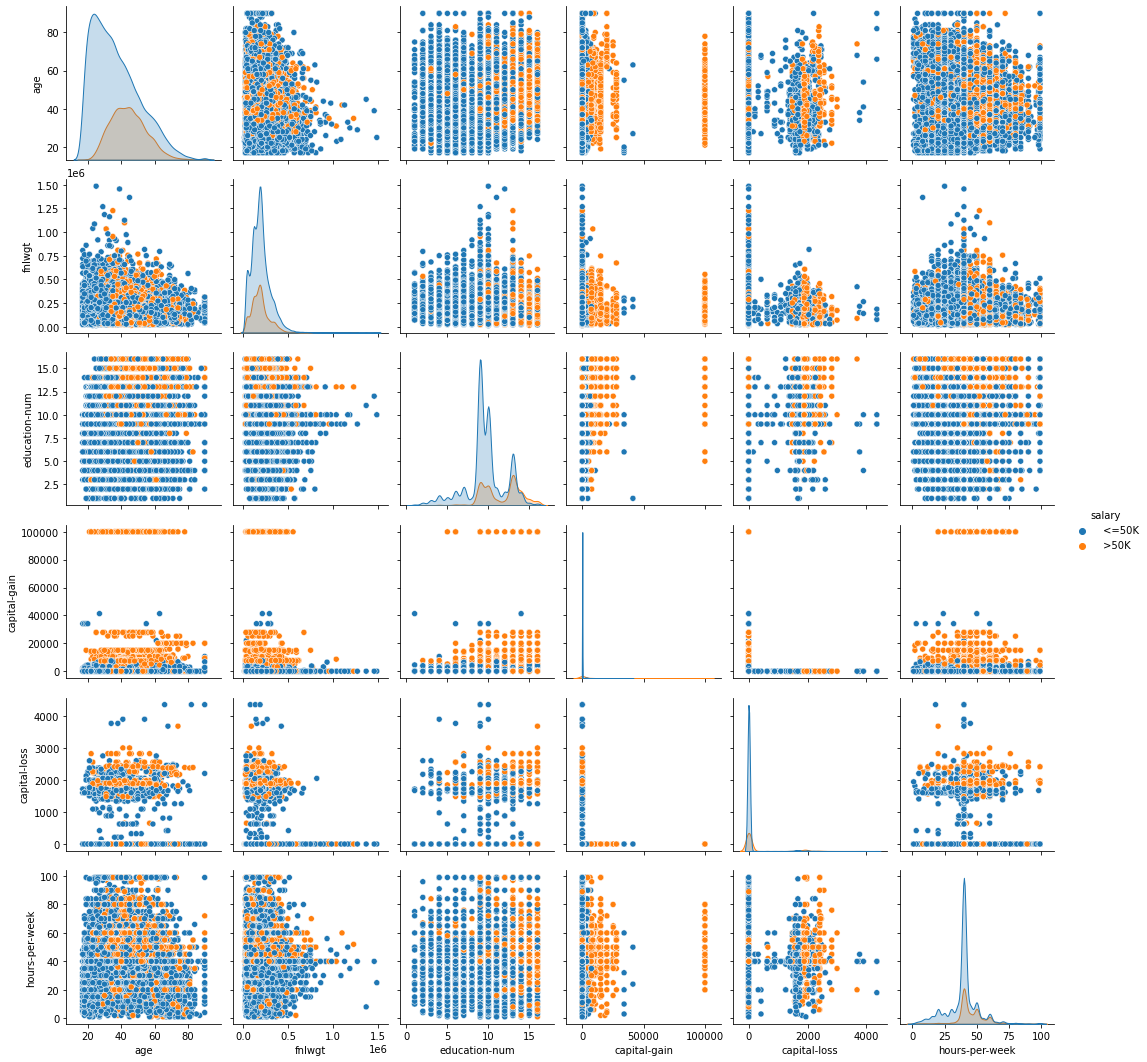

In [9]:
sns.pairplot(adult, hue = 'salary')

# Multinomial Logistic Regression

In [11]:
# Load iris dataset
iris = pd.read_csv('../DataSets/iris.data', header = None, 
                   names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])

# # Encode Class value into 1,2,3
# iris.replace('Iris-setosa','1',inplace = True)
# iris.replace('Iris-versicolor','2',inplace = True)
# iris.replace('Iris-virginica','3',inplace = True)

In [12]:
iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


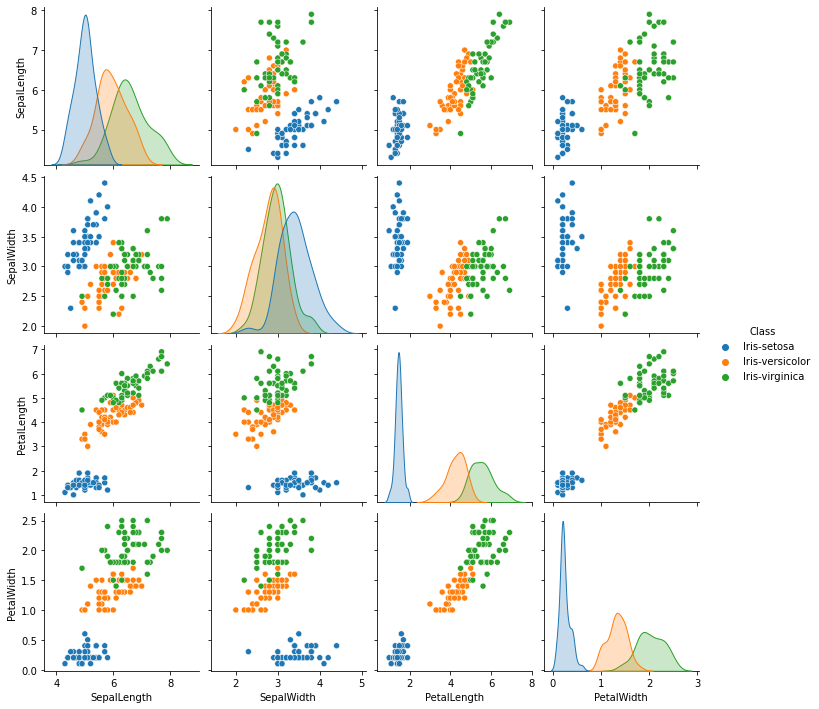

In [13]:
sns.pairplot(iris, hue = 'Class')

In [14]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
LR = LogisticRegression()
LR = LR.fit(x_train, y_train)

C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
predicted = LR.predict(x_test)
probs = LR.predict_proba(x_test)
# Generate and display different evaluation metrics
print('Test accuracy:\n')
print(metrics.accuracy_score(y_test, predicted))
print('\nConfusion matrix:\n')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

Test accuracy:

1.0

Confusion matrix:

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

